# Análisis Exploratorio

Laboratorio 03 – Deep Learning

Edwin Ortega 22305 - Esteban Zambrano 22119 - Diego García 22404

Link del repositorio:<br>
https://github.com/EstebanZG999/Lab3_DS

### Ejemplos de cada una de las modalidades

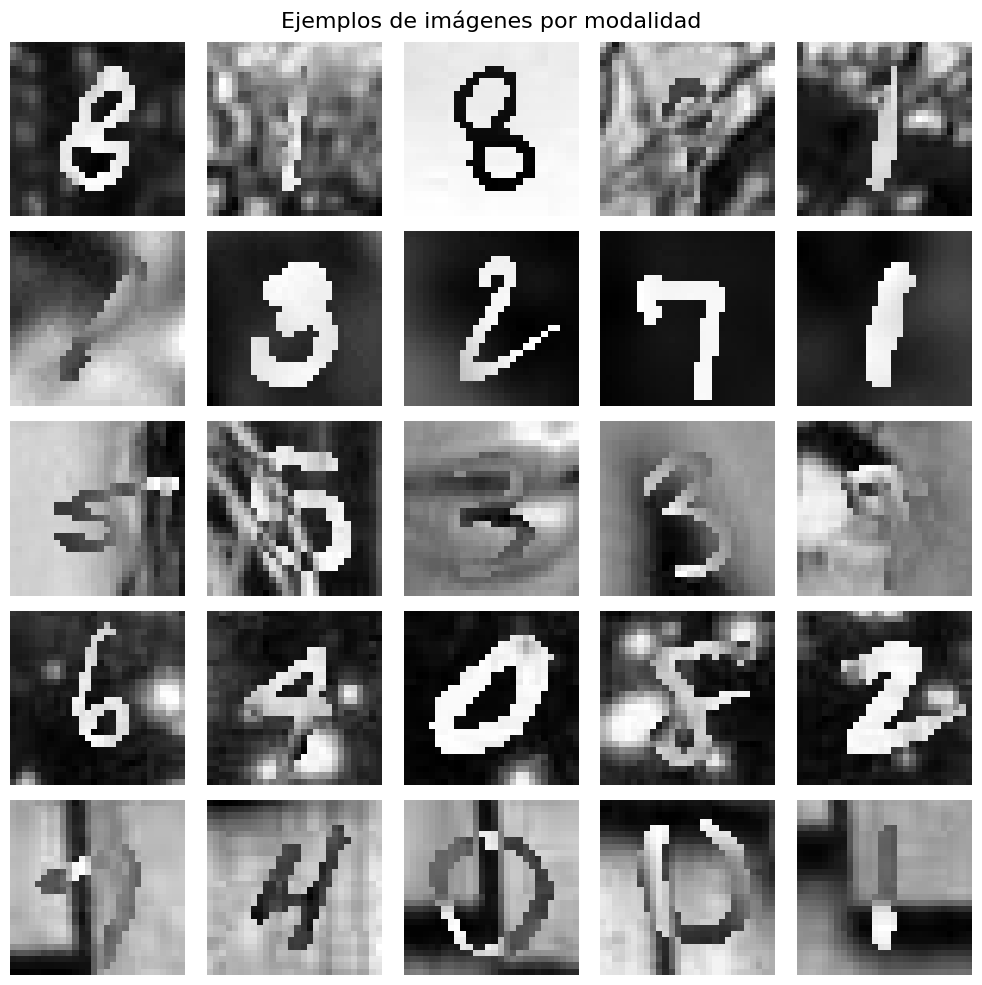

In [3]:
import os
import matplotlib.pyplot as plt
import cv2  # OpenCV para cargar imágenes
import random

# Ruta base
BASE_DIR = "../data/PolyMNIST/MMNIST/train"

# Modalidades
modalities = ["m0", "m1", "m2", "m3", "m4"]

# Mostrar 5 imágenes por modalidad aleatoriamente
fig, axs = plt.subplots(len(modalities), 5, figsize=(10, 10))

for i, modality in enumerate(modalities):
    modality_path = os.path.join(BASE_DIR, modality)
    
    # Tomar una clase al azar
    all_images = [f for f in os.listdir(modality_path) if f.endswith(".png")]
    
    # Seleccionar 5 imágenes aleatorias de esa clase
    samples = random.sample(all_images, 5)
    
    for j, img_name in enumerate(samples):
        img_path = os.path.join(modality_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        axs[i, j].imshow(img, cmap='gray')
        axs[i, j].axis('off')
        if j == 0:
            axs[i, j].set_ylabel(f"Mod {i}", fontsize=12)

plt.suptitle("Ejemplos de imágenes por modalidad", fontsize=16)
plt.tight_layout()
plt.show()

### Análisis de balanceo de clases

Distribución de clases (modalidad m0):
label
0       10
1       10
2       10
3       10
4       10
        ..
6737     1
6738     1
6739     1
6740     1
6741     1
Name: count, Length: 6742, dtype: int64


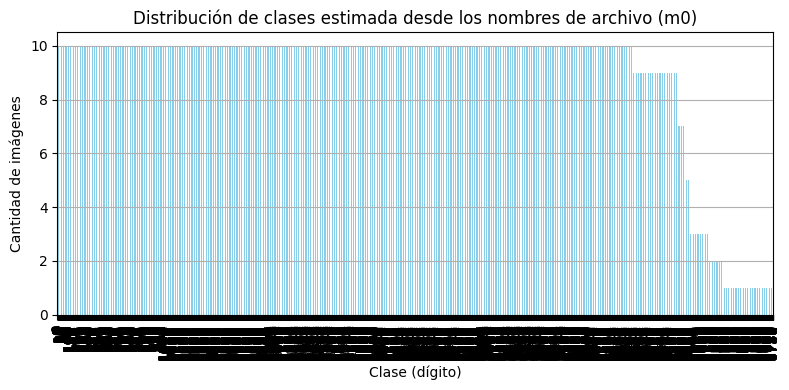

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Ruta base
BASE_DIR = "../data/PolyMNIST/MMNIST/train/m0"  # Usamos solo m0 como muestra
filenames = [f for f in os.listdir(BASE_DIR) if f.endswith(".png")]

# Extraer la clase a partir del nombre: "5.1.png" → clase 5
labels = []
for f in filenames:
    try:
        label = int(f.split(".")[0])
        labels.append(label)
    except ValueError:
        continue  # si el nombre no tiene formato esperado, lo salta

# Crear DataFrame de etiquetas
label_df = pd.DataFrame(labels, columns=["label"])

# Mostrar conteo por clase
label_counts = label_df["label"].value_counts().sort_index()
print("Distribución de clases (modalidad m0):")
print(label_counts)

# Graficar
plt.figure(figsize=(8,4))
label_counts.plot(kind="bar", color="skyblue")
plt.title("Distribución de clases estimada desde los nombres de archivo (m0)")
plt.xlabel("Clase (dígito)")
plt.ylabel("Cantidad de imágenes")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


El dataset PolyMNIST contiene imágenes organizadas por modalidad (`m0` a `m4`), pero no incluye directamente las etiquetas de clase accesibles a través de archivos `.csv` o `.json`. 

Se intentó deducir la clase a partir del nombre de archivo (`X.Y.png`), sin embargo, el número antes del punto representa un identificador único y no corresponde a la clase del dígito.

Por lo tanto, no es posible determinar la distribución de clases ni evaluar si el dataset está balanceado sin acceso a los archivos de etiquetas correctos (`label.csv`, `label.json`, `label.npy`, etc.).

Esta situación será considerada en el desarrollo del modelo, y se recomendará obtener una versión del dataset que incluya etiquetas explícitas para un análisis más profundo.